<h1>Random Forest Performance</h1>

The purpose of this script is to demonstrate the performance of Random Forest Regressor on the data.
We display the histogram of errors on the training and testing sets. We then plot a graph to show the importance of each feature in the data.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
from joblib import dump, load
warnings.filterwarnings('ignore')

We first retrain the random forest regressor model that had the strongest performance in the model comparisons notebook.

In [10]:
data = pd.read_csv('person_csvs/all_people.csv', index_col=0)
resp = [i for i in data.columns if 'RESP' in i and i!=' RESP']
data.drop(resp+['Time [s]','sec'], axis=1, inplace=True)

SS = StandardScaler()
X = data.drop(' RESP', axis=1)
columns = X.columns
SS.fit(X, y=None)
y = data[' RESP'].values
X = SS.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Uncomment this line and comment the two below it if you wish to load a model
# model = load('saved_models/RFF_joblib') 
model = RandomForestRegressor()
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print('MSE:', MSE)
print('MAE:', MAE)
print('R2:', R2)

MSE: 0.08847402845701233
MAE: 0.24170447743223777
R2: 0.39587954073835874


This cell plots histograms of the testing set and training set errors.

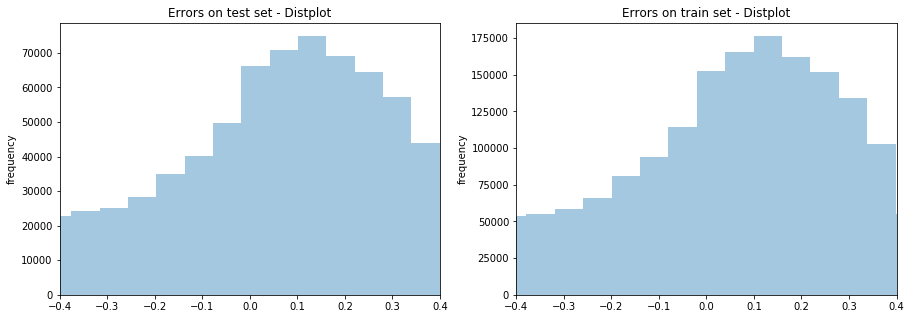

In [11]:
errors_test = pd.DataFrame((y_pred - y_test)).dropna()
errors_train = pd.DataFrame((y_pred_train - y_train)).dropna()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Errors on test set - Distplot')
sns.distplot(errors_test, hist=True, kde=False)
plt.xlabel('')
plt.ylabel('frequency')
plt.xlim(-0.4, 0.4)

plt.subplot(1, 2, 2)
plt.title('Errors on train set - Distplot')
sns.distplot(errors_train, hist=True, kde=False)
plt.xlabel('')
plt.ylabel('frequency')
plt.xlim(-0.4, 0.4)

plt.subplots_adjust(wspace=0.2)
plt.show()

We can see that the histograms of errors on both the train set and test set have very similar structures. The model is well fit. Note that the scales are slightly different due to the size differences in the test set and the train set.

In [12]:
X = pd.DataFrame(X, columns=columns)

importances = model.feature_importances_
std = np.std([model.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
feature_importances = []
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
    feature_importances.append((X.columns[indices[f]], importances[indices[f]]))

values = [i[1] for i in feature_importances]
names = [i[0] for i in feature_importances]

# Plot the feature importances of the forest
plt.figure(figsize=(20,12))
plt.title("Random Forest Feature importances", fontsize=20)
plt.barh(range(len(names)), values, color="r", yerr=std[indices], align="center")
plt.yticks(range(len(names)), names, fontsize=15)
plt.xticks(np.linspace(0, max(importances), 30), rotation=45)
plt.show()

AttributeError: 'XGBRegressor' object has no attribute 'estimators_'